In [ ]:
### PROBLEM STATEMENT ###
# Based on followings features we have to predict the person is survived or not

In [24]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
#read data
data = pd.read_csv('titanic_train.csv')
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.shape

(891, 13)

In [27]:
data.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# observation
#1) junk column unnamed delete it
#2) i suspect there is problem in std of fare and max value
#3) age column has missing value
#4) deleting name , ticket , cabin column because it would help to predict label it a useless data
#5) encoding sex and embarked column 

In [29]:
# first removing all unncessary data

data = data.drop(['Unnamed: 0' , 'Name' , 'Ticket' , 'Cabin'] , axis=1)

In [30]:
#converting srting to number or using encoding technique to sex and embarked
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [31]:
df1 = lab_enc.fit_transform(data['Sex']) #applying label encoder on categorical data

In [32]:
df2 = lab_enc.fit_transform(data['Embarked']) #applying label encoder on categorical data

In [33]:
data['Sex']=df1  #reassign to original dataset

In [34]:
data['Embarked']=df2  #reassign to original dataset

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


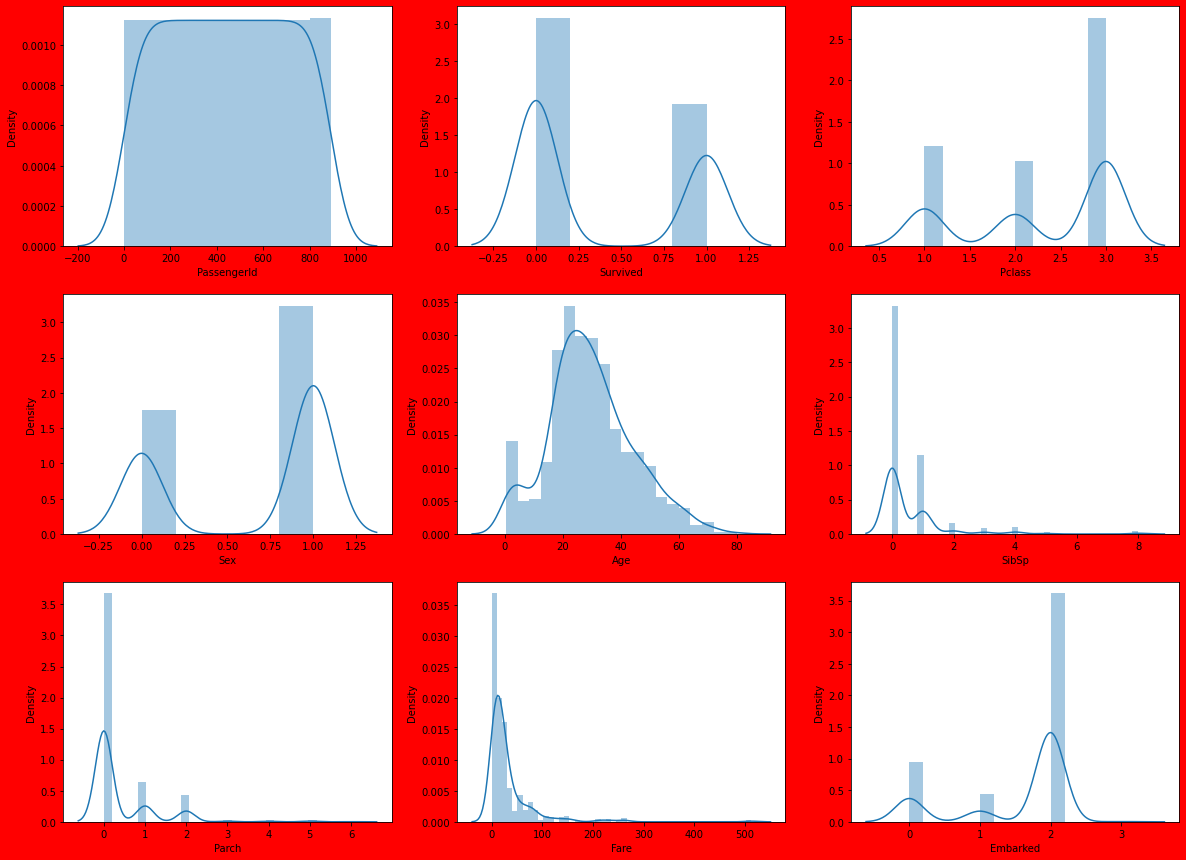

In [37]:
#lets see how data is distributed
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

In [38]:
# we observe some outlier in fare and age and also missing value
# so first treating missing value using mean method
data['Age'].mean()

29.69911764705882

In [39]:
np.ceil(data['Age'].mean())


30.0

In [46]:
data['Age'].fillna(30 , inplace=True)

In [47]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.758889,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [48]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


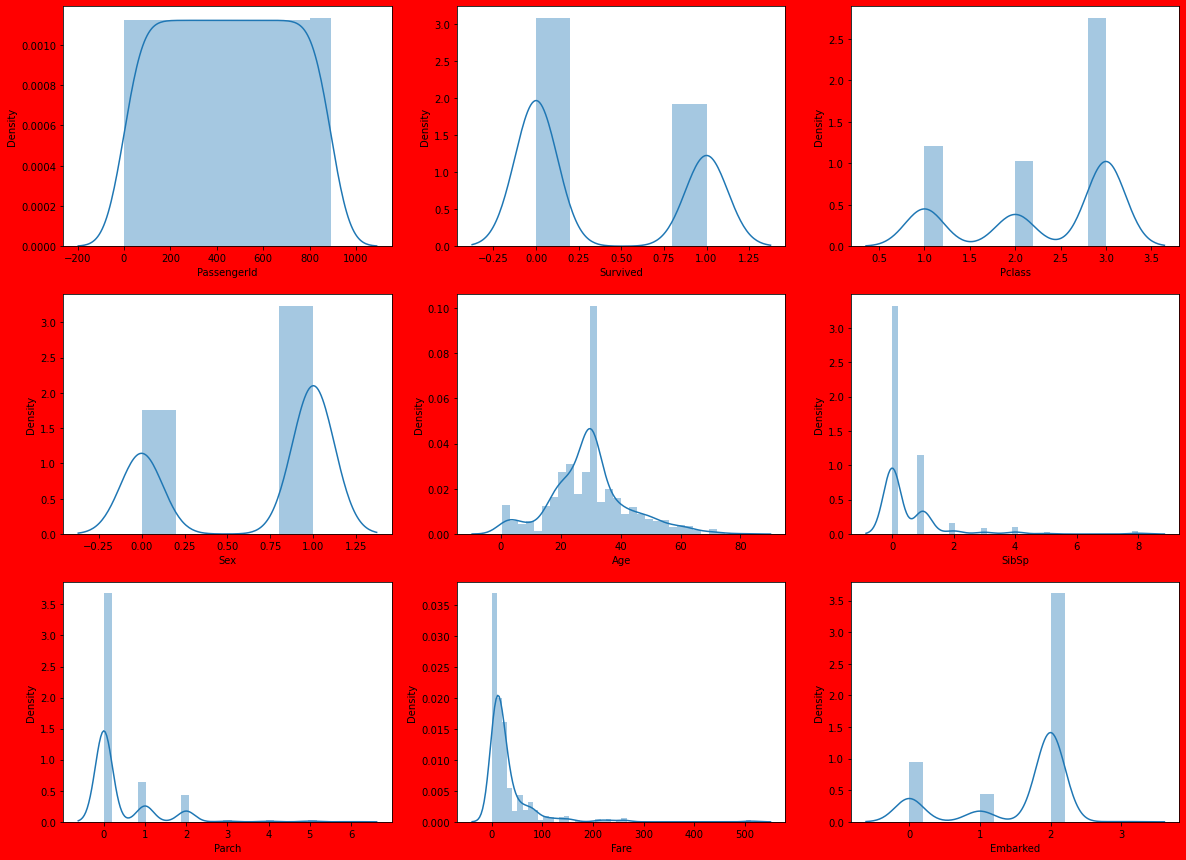

In [49]:
#lets see how data is distributed after filling null value in age
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

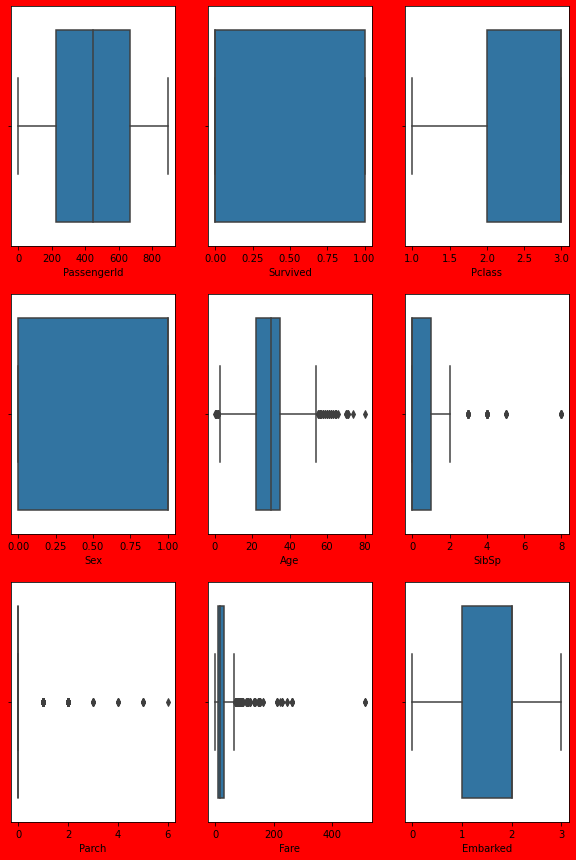

In [50]:
# lets see outlier
plt.figure(figsize=(10,15) , facecolor='red')
graph = 1

for column in data:
    if graph <= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    graph += 1
plt.show()

In [52]:
# we observe outlier in age and fare so treat it 
# here im using iqr technique
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [53]:
#removing for fare coz its a skwed data
fare_high=(q3.Fare + (1.5*iqr.Fare))
fare_high

65.6344

In [55]:
outlier_high=np.where(data['Fare']>fare_high)
outlier_high

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

In [56]:
data=data.drop(data.index[outlier_high])
data.shape

(775, 9)

In [57]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
770,886,887,0,2,1,27.0,0,0,13.0000,2
771,887,888,1,1,0,19.0,0,0,30.0000,2
772,888,889,0,3,0,30.0,1,2,23.4500,2
773,889,890,1,1,1,26.0,0,0,30.0000,0


In [58]:
#removing for age coz its a skwed data
age_high=(q3.Age + (1.5*iqr.Age))
age_high

54.5

In [60]:
outlier_high=np.where(data['Age']>age_high)
outlier_high

(array([ 10,  14,  30,  49,  85,  87, 106, 137, 154, 158, 209, 228, 249,
        282, 393, 404, 420, 422, 427, 428, 471, 480, 493, 543, 544, 547,
        562, 583, 593, 602, 668, 738], dtype=int64),)

In [61]:
data=data.drop(data.index[outlier_high])
data.shape

(743, 9)

In [62]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
738,886,887,0,2,1,27.0,0,0,13.0000,2
739,887,888,1,1,0,19.0,0,0,30.0000,2
740,888,889,0,3,0,30.0,1,2,23.4500,2
741,889,890,1,1,1,26.0,0,0,30.0000,0


In [63]:
# for age low
age_low=(q1.Age - (1.5*iqr.Age))
age_low

2.5

In [64]:
outlier_low=np.where(data['Age']<age_low)
outlier_low

(array([  6,  13,  66, 101, 140, 147, 156, 176, 278, 312, 316, 390, 400,
        439, 532, 534, 624, 652, 664, 684, 687, 690], dtype=int64),)

In [65]:
data=data.drop(data.index[outlier_low])
data.shape

(721, 9)

In [66]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,2,3,1,3,0,26.0,0,0,7.9250,2
2,3,4,1,1,0,35.0,1,0,53.1000,2
3,4,5,0,3,1,35.0,0,0,8.0500,2
4,5,6,0,3,1,30.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
716,886,887,0,2,1,27.0,0,0,13.0000,2
717,887,888,1,1,0,19.0,0,0,30.0000,2
718,888,889,0,3,0,30.0,1,2,23.4500,2
719,889,890,1,1,1,26.0,0,0,30.0000,0


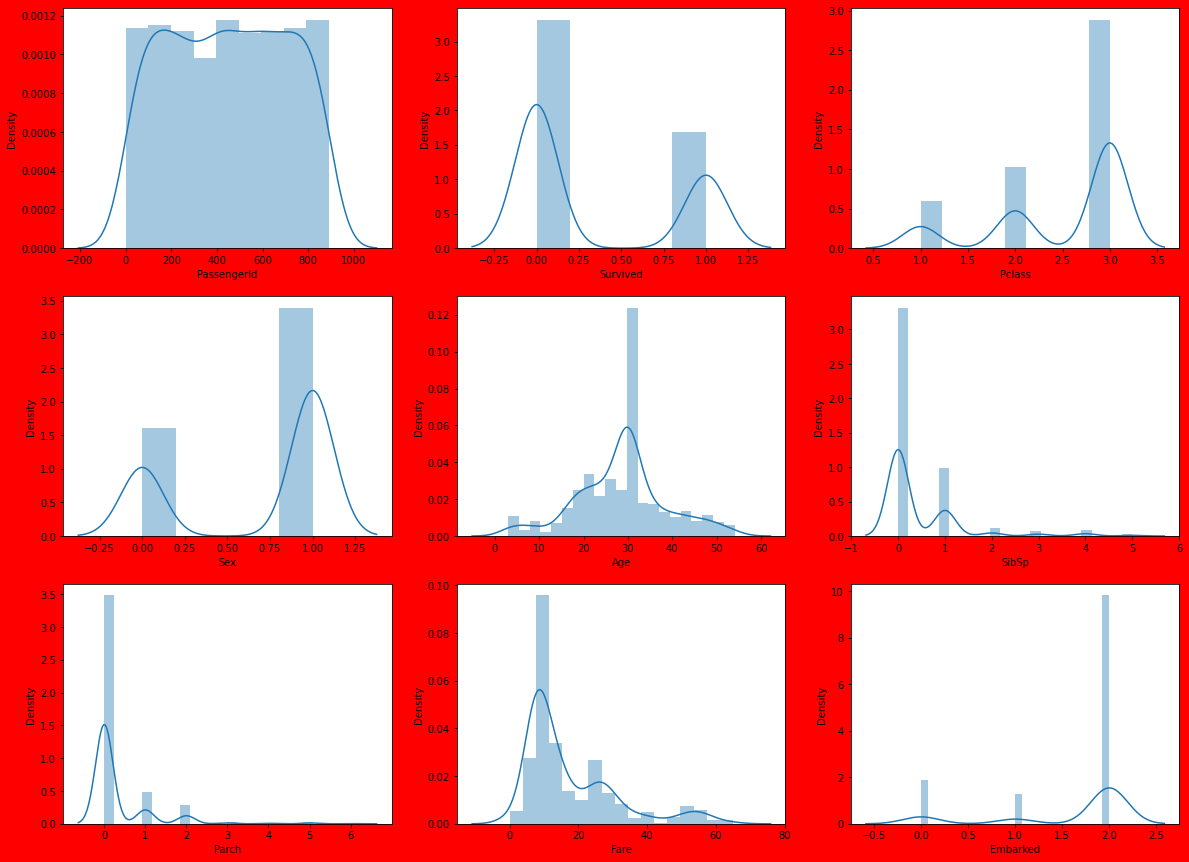

In [67]:
#lets see how data is distributed after filling null value in age and removing outliers
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show() 

In [68]:
#seperating feature and label
X = data.drop(['Survived'] , axis=1)
y = data['Survived']

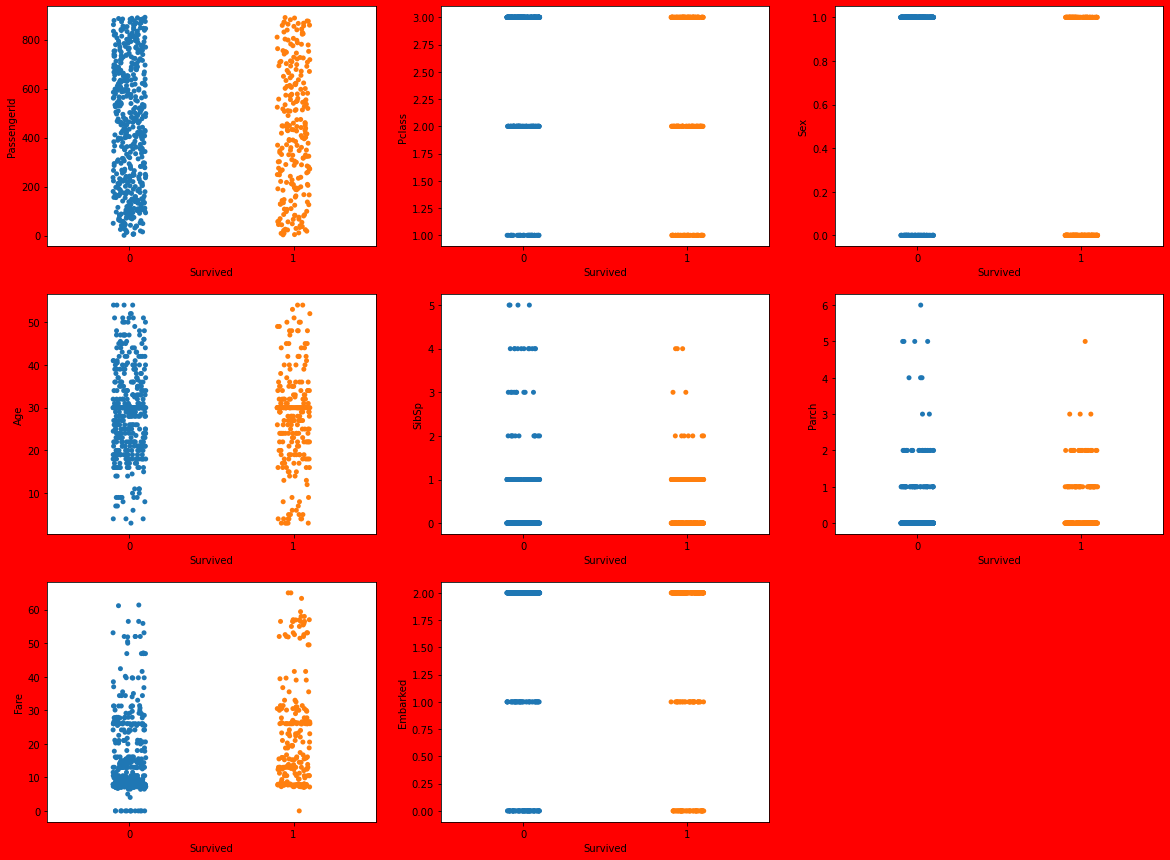

In [71]:
# checking relationship of feature and label
plt.figure(figsize=(20,15) , facecolor='red')
plotnumber=1

for column in X:
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber += 1
plt.show()

In [72]:
# after seeing all the graph as per me all are contrubuting to label so keepling all features

In [73]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [74]:
# splitting data into train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [75]:
## IMPORT LOGISTIC REGRESSION ##
from sklearn.linear_model import LogisticRegression

In [76]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [77]:
# training for traing data
log_reg.predict(X_train)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [78]:
#training Score
log_reg.score(X_train,y_train)

0.8055555555555556

In [86]:
#training for test dataset
y_pred=log_reg.predict(X_test)

In [80]:
#testing Score
log_reg.score(X_test,y_test)

0.7569060773480663

In [81]:
# reports
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [88]:
#accuracy 
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.7569060773480663

In [90]:
#confusion matrix
Confusion_matrix=confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[109,  23],
       [ 21,  28]], dtype=int64)

In [93]:
print('\n\n Classification Report\n' , classification_report(y_test,y_pred,digits=2))



 Classification Report
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       132
           1       0.55      0.57      0.56        49

    accuracy                           0.76       181
   macro avg       0.69      0.70      0.70       181
weighted avg       0.76      0.76      0.76       181



In [94]:
# Hyperparameter tuning#
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid={'penalty':['none' , 'elasticnet' , 'l1' , 'l2'],
           'C':[0.001,0.01,1,10,100]}

In [96]:
gridsearch=GridSearchCV(estimator=log_reg,param_grid=param_grid)

In [97]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'penalty': ['none', 'elasticnet', 'l1', 'l2']})

In [98]:
#see best para
gridsearch.best_params_

{'C': 0.001, 'penalty': 'none'}

In [129]:
Log_reg=LogisticRegression(C=0.001,penalty='none')

In [130]:
Log_reg.fit(X_train,y_train)

LogisticRegression(C=0.001, penalty='none')

In [131]:
y_pred=Log_reg.predict(X_test)

In [132]:
Log_reg.score(X_test,y_test)

0.7569060773480663

In [ ]:
# both are giving same result